In [3]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [5]:
df = pd.read_excel("./data/mtcars.xlsx")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df = df[['mpg', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs']]
df['vs'] = df['vs'].astype('category')
df.head()

,mpg,disp,hp,drat,wt,qsec,vs
0,21.0,160.0,110,3.90,2.620,16.46,0
1,21.0,160.0,110,3.90,2.875,17.02,0
2,22.8,108.0,93,3.85,2.320,18.61,1
3,21.4,258.0,110,3.08,3.215,19.44,1
4,18.7,360.0,175,3.15,3.440,17.02,0


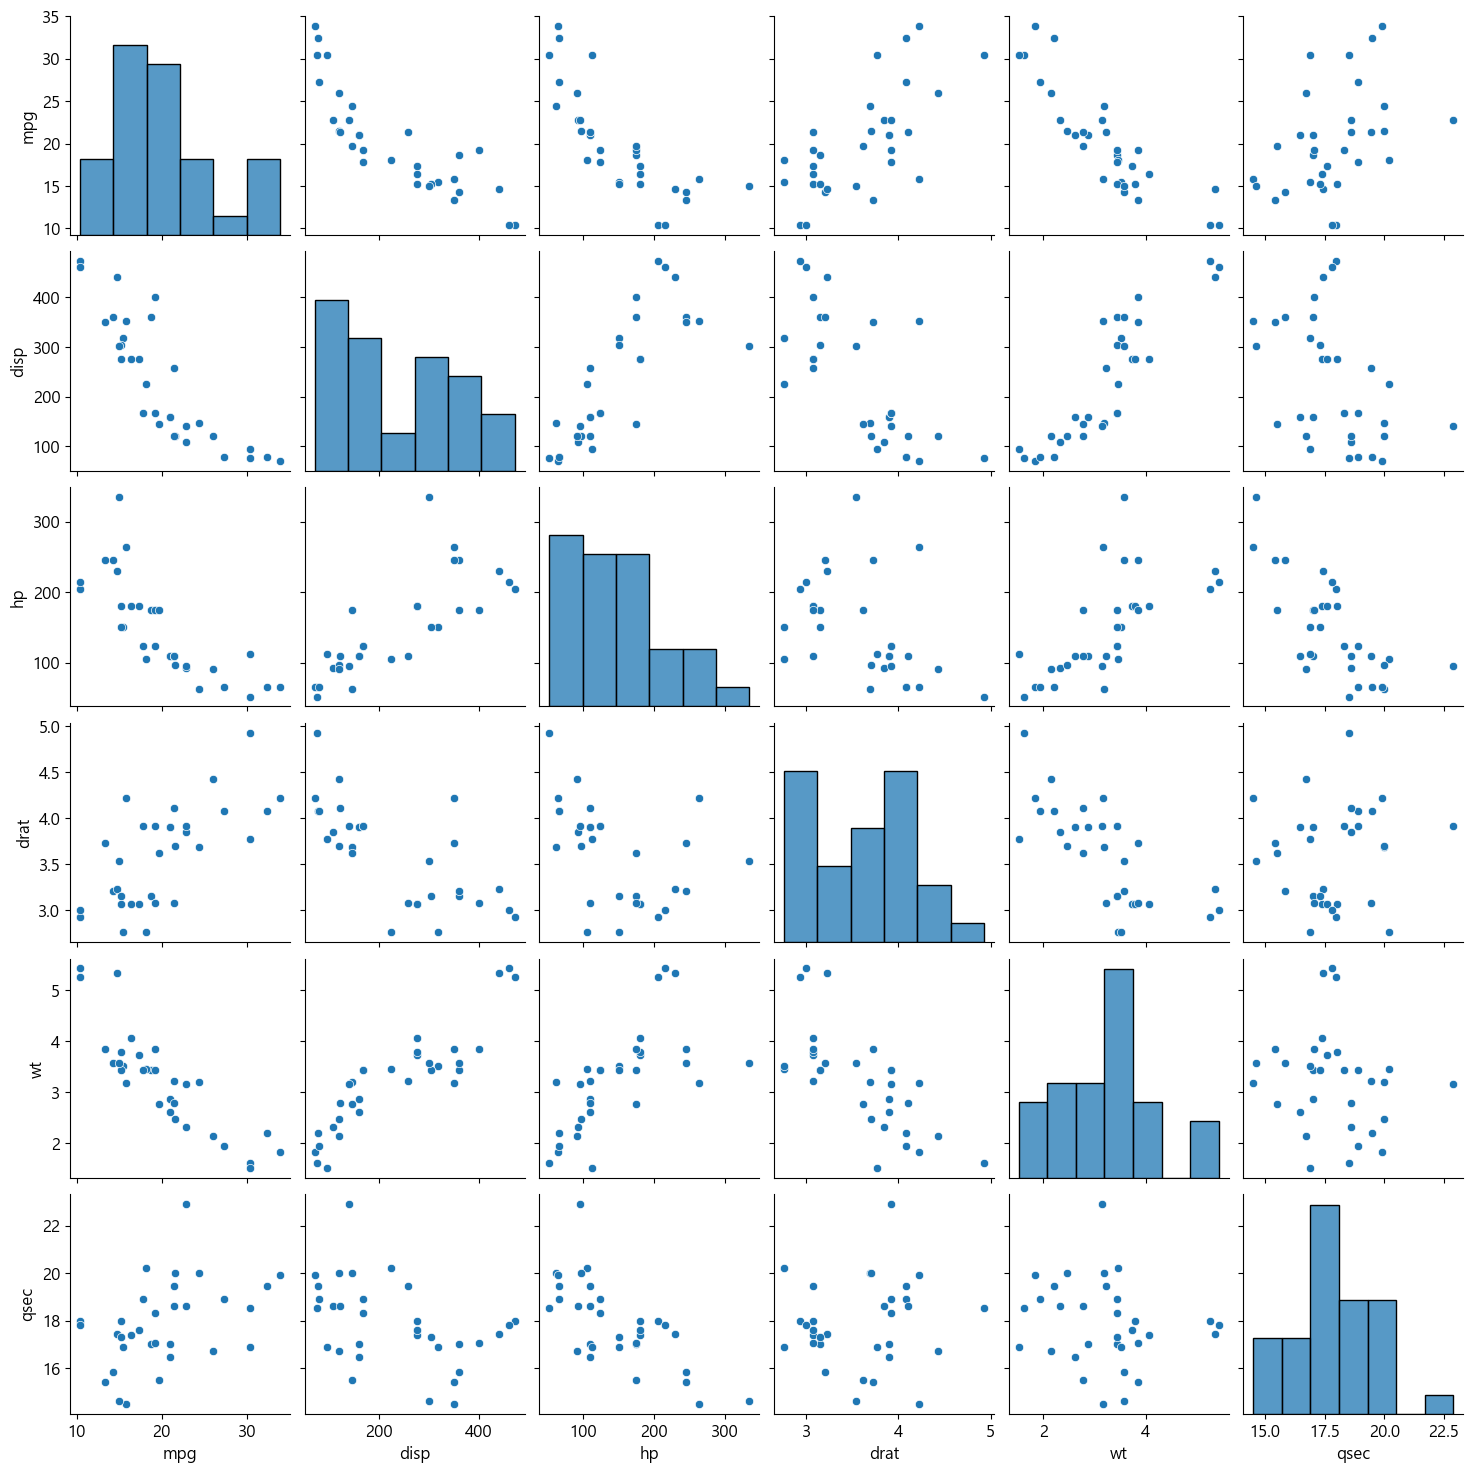

In [7]:
sns.pairplot(df)
plt.show()

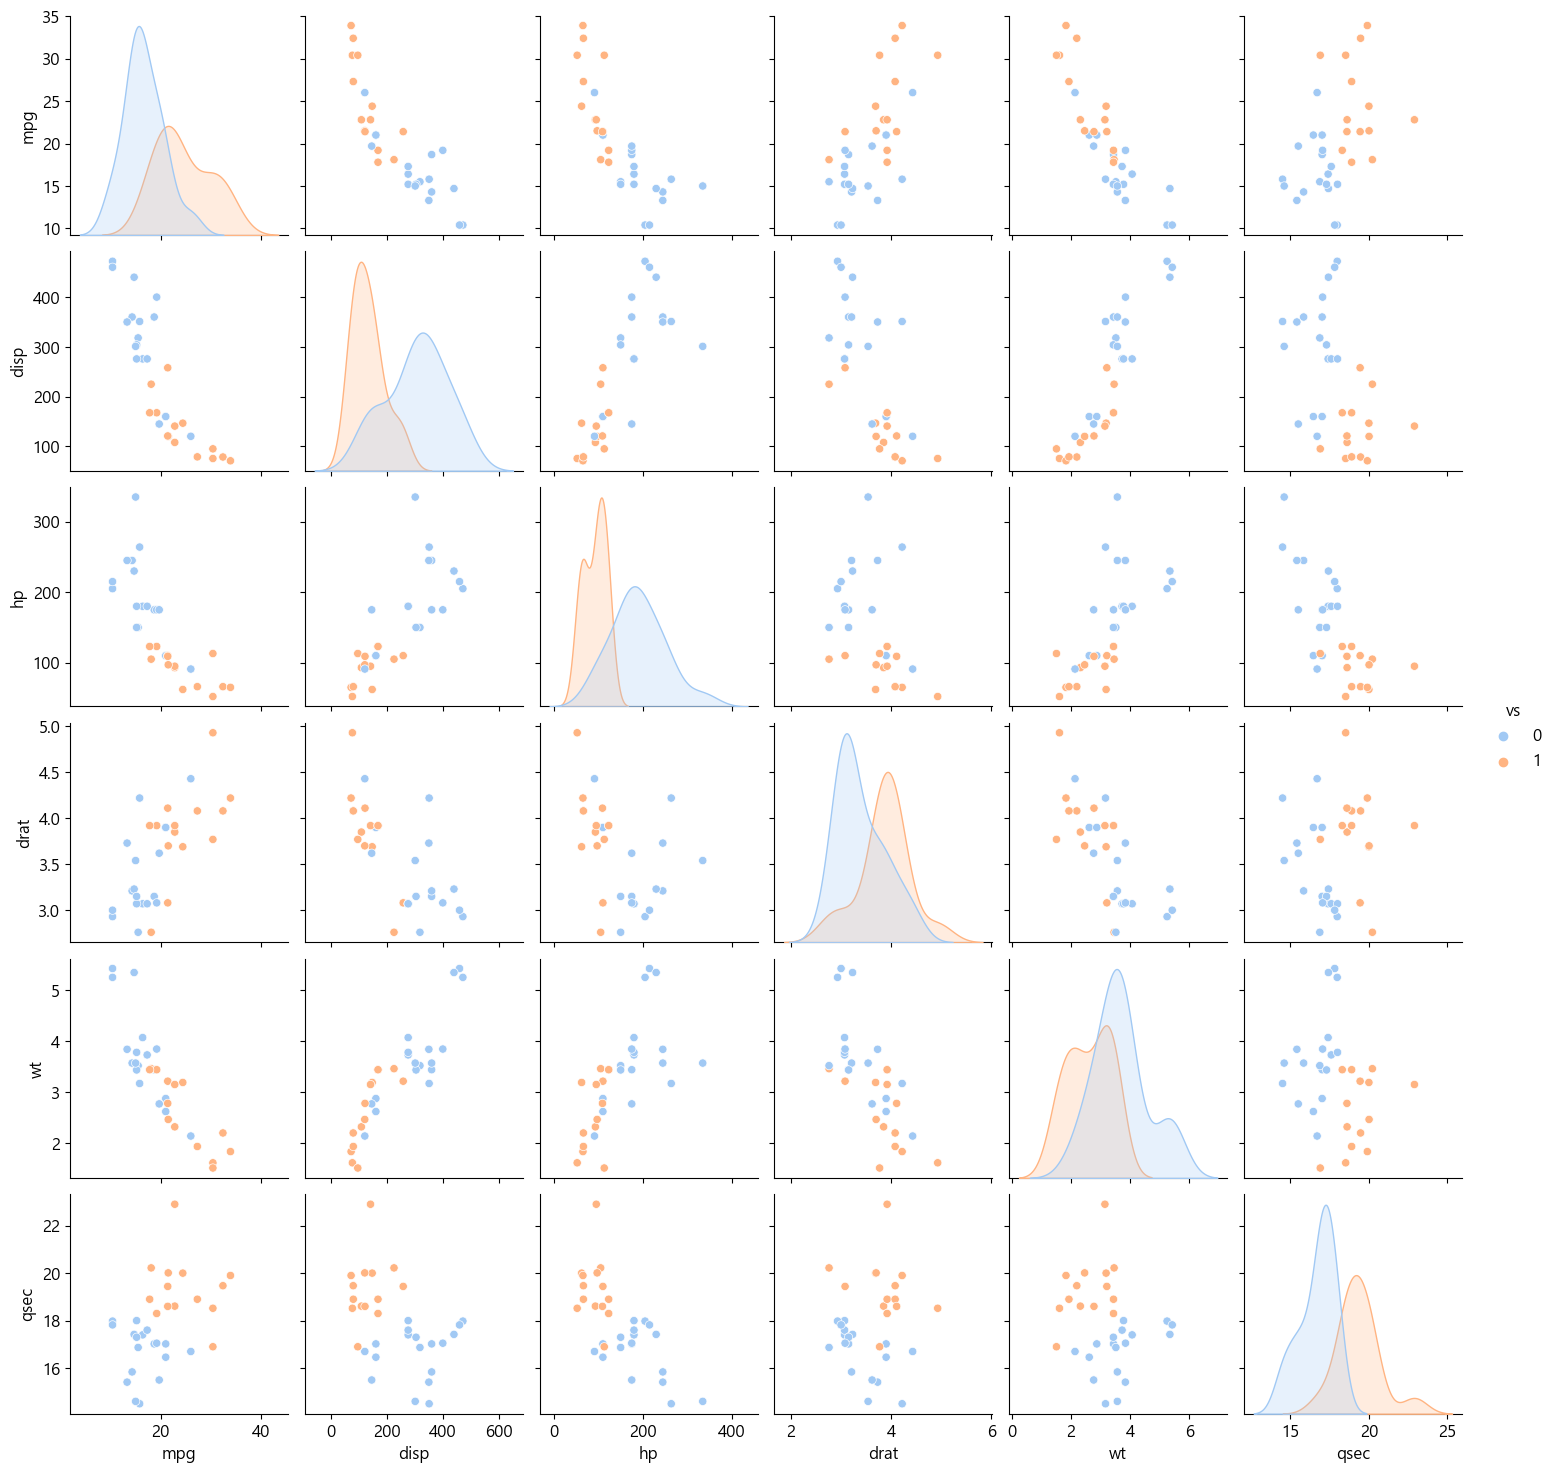

In [8]:
sns.pairplot(df,
            diag_kind='kde',    # 대각선에 커널밀도분포 표시
            hue='vs',           # 범주별 색상 구분
            palette='pastel'    # pastel, bright, deep, muted, colorblind, dark
)
plt.show()
plt.close()

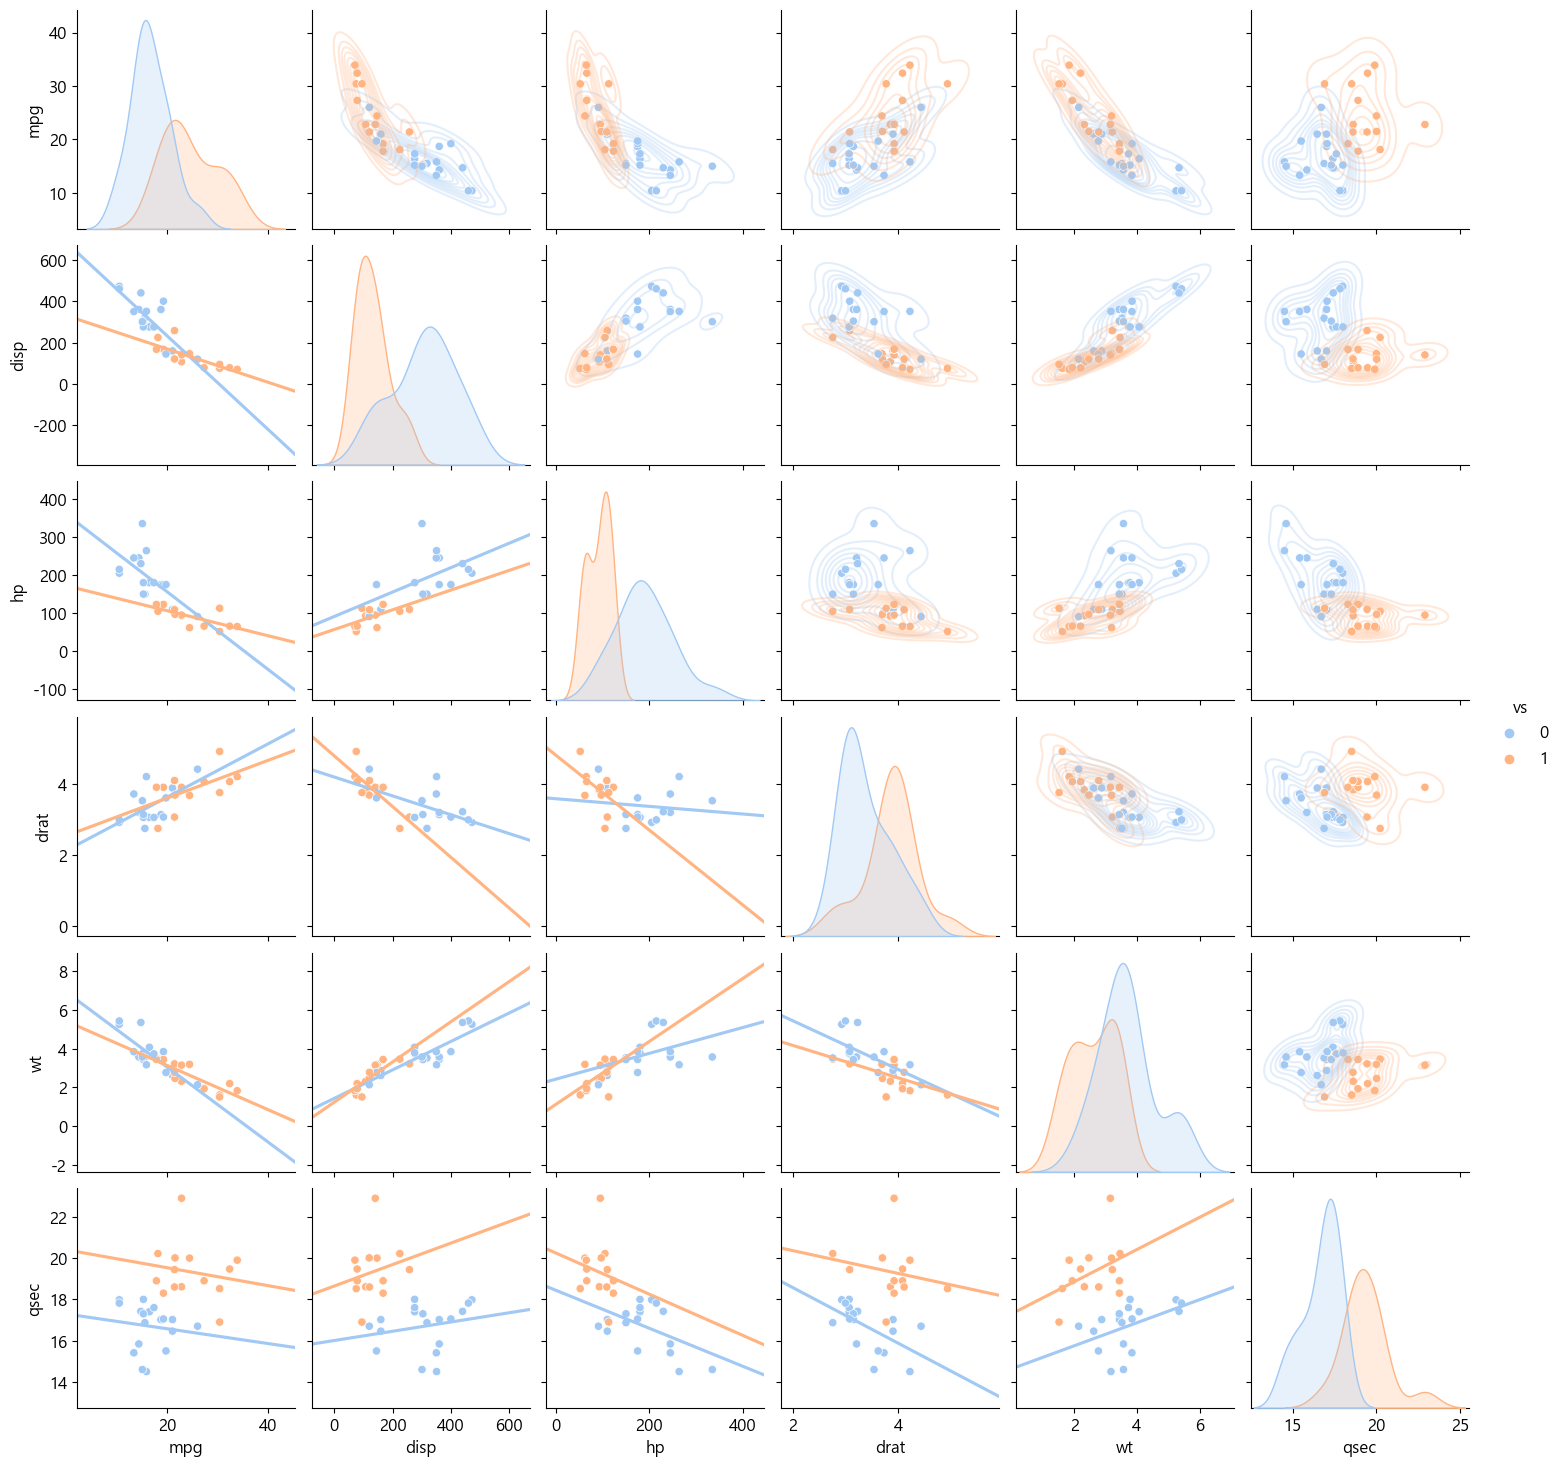

In [9]:
g = sns.pairplot(df,
              diag_kind='kde',  # 대각선에 커널밀도분포 표시
              hue='vs',  # 범주별 색상 구분
              palette='pastel'
)

# 대각선 위쪽에는 커널밀도추정, 아래쪽에는 회귀선 표시
g.map_upper(sns.kdeplot, alpha=0.3)
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)

plt.show()

In [10]:
df2 = df.drop('vs', axis=1)
corr = df2.corr(method='pearson')
corr

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


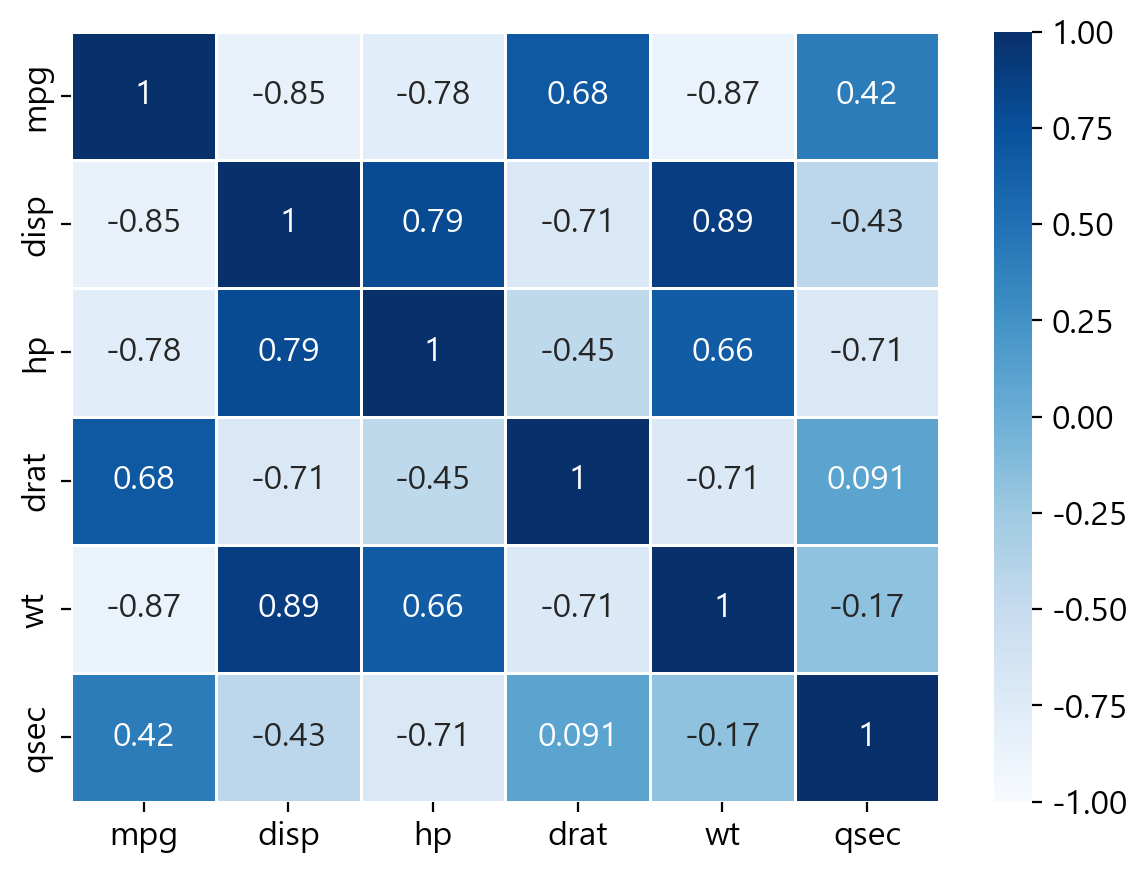

In [11]:
plt.figure(figsize=(7,5), dpi=200)
sns.heatmap(df2.corr(method='pearson'), annot = True, cmap = 'Blues',
           vmin = -1, vmax=1, linewidths=0.5)
plt.show()
plt.close()

In [12]:
s, p = pearsonr(df2['mpg'], df2['disp'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['disp'], df2['hp'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['hp'], df2['drat'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['drat'], df2['wt'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['wt'], df2['qsec'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

s, p = pearsonr(df2['qsec'], df2['mpg'])
print("statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p,  "대립" if p <= 0.05 else "귀무"))

statistic: -0.848, p-value: 0.000, 대립가설 채택
statistic: 0.791, p-value: 0.000, 대립가설 채택
statistic: -0.449, p-value: 0.010, 대립가설 채택
statistic: -0.712, p-value: 0.000, 대립가설 채택
statistic: -0.175, p-value: 0.339, 귀무가설 채택
statistic: 0.419, p-value: 0.017, 대립가설 채택


In [13]:
names = df2.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    # 기본적으로 i 다음 위치를 의미하지만 i가 마지막 인덱스일 경우 0으로 설정
    j = i + 1 if i < n - 1 else 0

    fields = names[i] + ' vs ' + names[j]
    s, p = pearsonr(df2[names[i]], df2[names[j]])
    result = p < pv

    data.append({'fields': fields, 'statistic': s, 'pvalue': p, 'result': result})

rdf = pd.DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf

,statistic,pvalue,result
fields,,,
mpg vs disp,-0.847551,9.380327e-10,True
disp vs hp,0.790949,7.142679e-08,True
hp vs drat,-0.448759,9.988772e-03,True
drat vs wt,-0.712441,4.784260e-06,True
wt vs qsec,-0.174716,3.388683e-01,False
qsec vs mpg,0.418684,1.708199e-02,True


- 스피어만 상관계수

In [14]:
origin = pd.read_excel("./data/mtcars.xlsx", index_col='name')
origin.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
df = origin[['mpg', 'vs', 'am', 'gear', 'carb']]
df.head()

,mpg,vs,am,gear,carb
name,,,,,
Mazda RX4,21.0,0,1,4,4
Mazda RX4 Wag,21.0,0,1,4,4
Datsun 710,22.8,1,1,4,1
Hornet 4 Drive,21.4,1,0,3,1
Hornet Sportabout,18.7,0,0,3,2


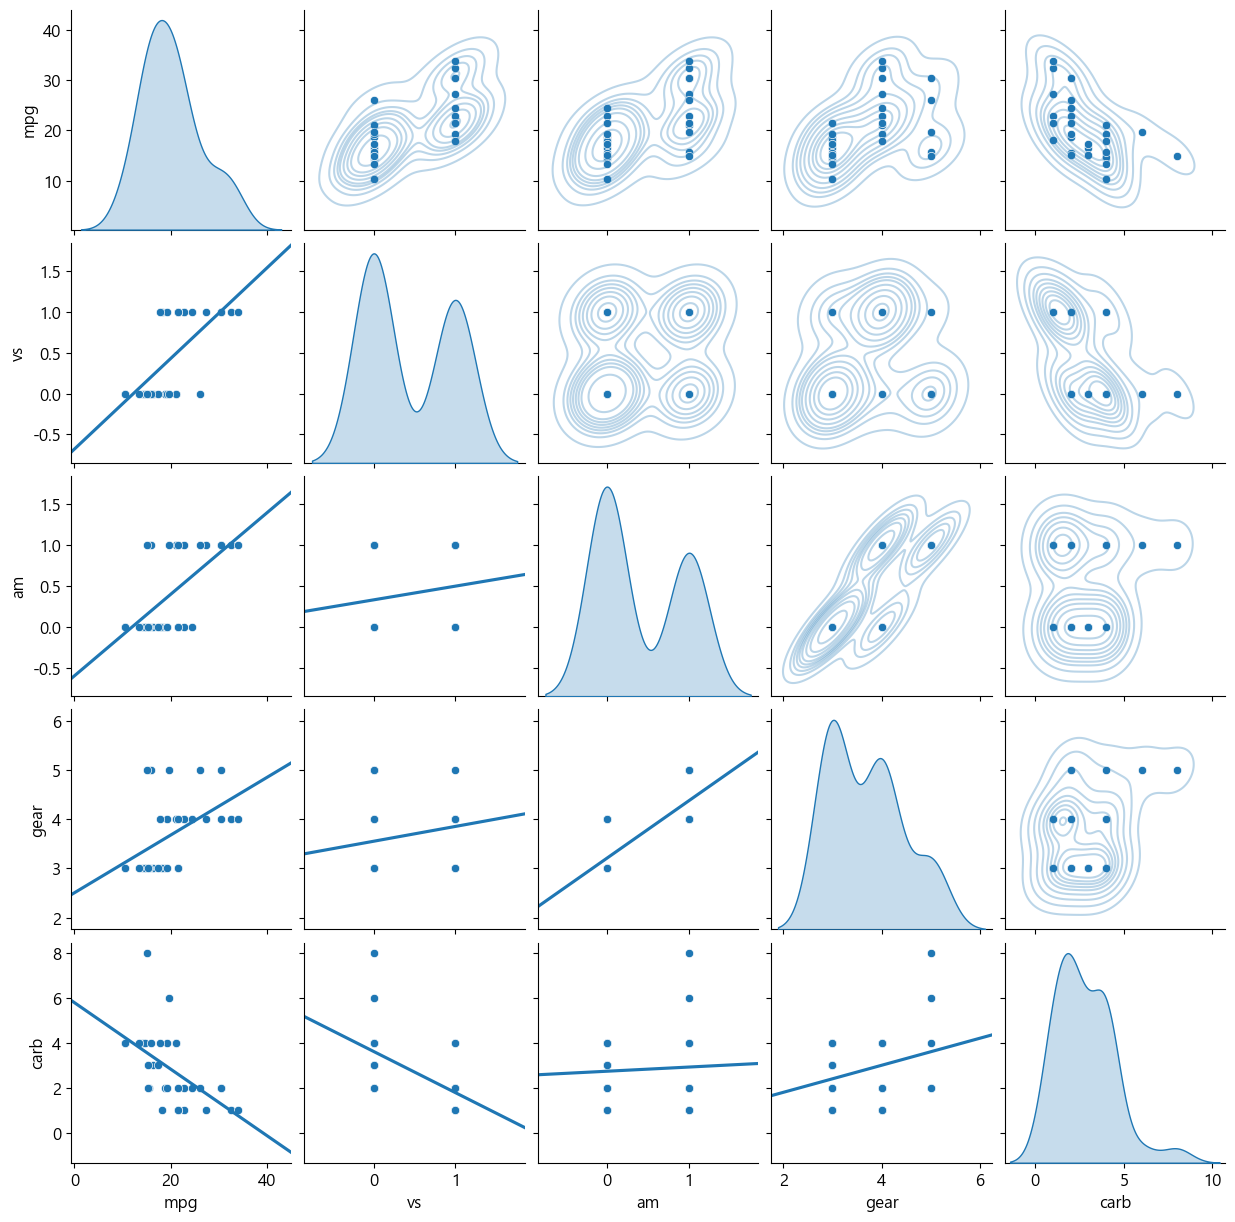

In [16]:
g = sns.pairplot(df, diag_kind='kde', palette='pastel')

# 대각선 위쪽에는 커널밀도추정, 아래쪽에는 회귀선 표시
g.map_upper(sns.kdeplot, alpha=0.3)
g.map_lower(sns.regplot, scatter=False, truncate=False, ci=False)

plt.show()
plt.close()

In [17]:
corr = df.corr(method='spearman')
corr

,mpg,vs,am,gear,carb
mpg,1.000000,0.706597,0.562006,0.542782,-0.657498
vs,0.706597,1.000000,0.168345,0.282662,-0.633695
am,0.562006,0.168345,1.000000,0.807688,-0.064365
gear,0.542782,0.282662,0.807688,1.000000,0.114887
carb,-0.657498,-0.633695,-0.064365,0.114887,1.000000


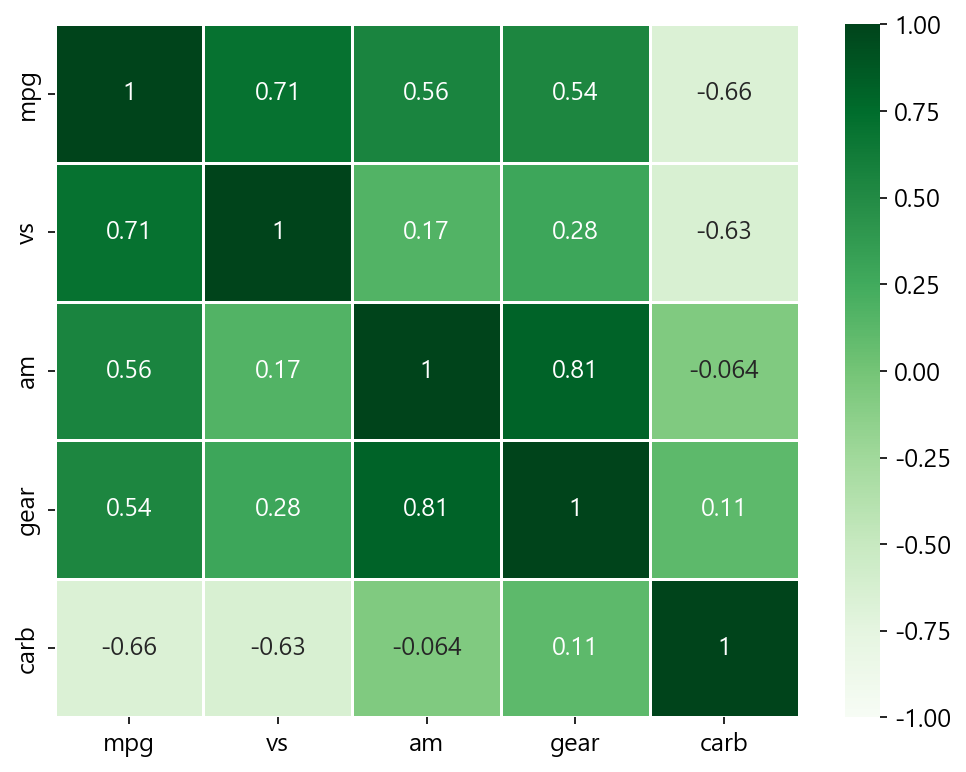

In [18]:
plt.figure(figsize=(8, 6), dpi=150)
sns.heatmap(corr, annot = True, cmap = 'Greens', vmin = -1, vmax=1, linewidths=.5)
plt.show()
plt.close()

In [19]:
names = df.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    # 기본적으로 i 다음 위치를 의미하지만 i가 마지막 인덱스일 경우 0으로 설정
    j = i + 1 if i < n - 1 else 0

    fields = names[i] + ' vs ' + names[j]
    s, p = spearmanr(df[names[i]], df[names[j]])
    result = p < pv

    data.append({'fields': fields, 'statistic': s, 'pvalue': p, 'result': result})

rdf = pd.DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf

,statistic,pvalue,result
fields,,,
mpg vs vs,0.706597,6.191450e-06,True
vs vs am,0.168345,3.570439e-01,False
am vs gear,0.807688,2.304063e-08,True
gear vs carb,0.114887,5.312358e-01,False
carb vs mpg,-0.657498,4.337570e-05,True


### 연습문제 1

In [20]:
df1 = pd.read_excel("./data/baseball.xlsx")
df1.head()

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269


- 모두 연속형 데이터이므로 피어슨 상관계수 사용

In [21]:
df1.describe()

,홈런수,평균타율
count,14.000000,14.000000
mean,188.071429,0.264714
std,21.054743,0.007518
min,161.000000,0.252000
25%,172.250000,0.259500
50%,188.500000,0.262500
75%,198.250000,0.271250
max,230.000000,0.277000


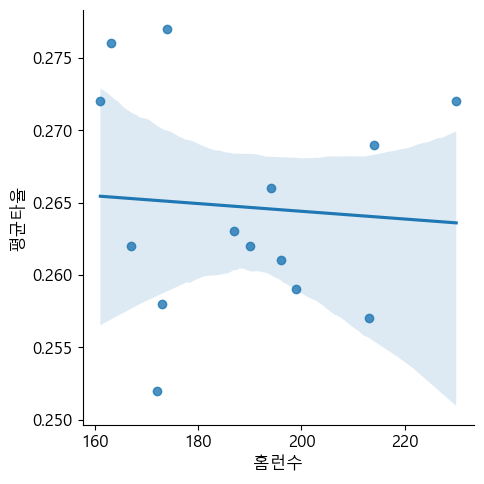

In [22]:
sns.lmplot(data = df1, x = '홈런수', y = '평균타율')
plt.show()

- 산점도 그래프와 추세선 상으로는 뚜렷한 상관관계가 있다고 보기 어렵다.

In [23]:
df1.corr()

,홈런수,평균타율
홈런수,1.000000,-0.074695
평균타율,-0.074695,1.000000


- 피어슨 상관계수는 -0.07로 상관관계가 매우 약하다

In [24]:
pearsonr(df1['홈런수'], df1['평균타율'])

PearsonRResult(statistic=-0.07469493488185416, pvalue=0.7996661879546072)

- 피어슨 상관계수에 대한 p-value는 0.8로 귀무가설이 채택되어 홈런수와 평균타율은 상관관계가 없다는 결론이 도출된다.

### 연습문제 2

In [25]:
df2 = pd.read_excel("./data/product.xlsx")
df2.head()

,x,y
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31


- 두 데이터는 연속성 데이터이므로 피어슨 상관계수를 사용한다

In [26]:
df2.describe()

,x,y
count,10.00000,10.000000
mean,35.80000,31.000000
std,4.91709,3.944053
min,26.00000,25.000000
25%,33.25000,29.000000
50%,36.00000,30.500000
75%,39.00000,31.750000
max,44.00000,40.000000


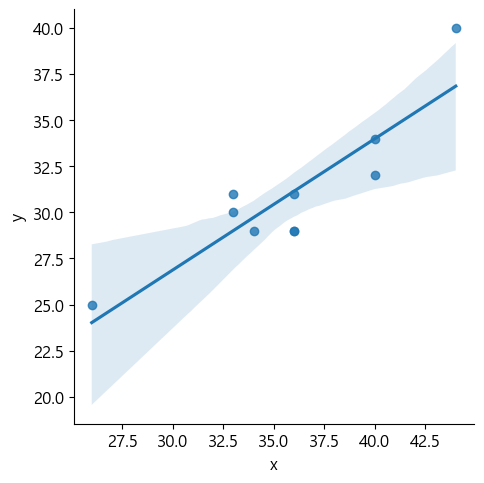

In [27]:
sns.lmplot(data = df2, x = 'x', y = 'y')
plt.show()

- 산점도와 추세선 상으로는 두 변수간에는 양의 상관관계가 있는 것으로 보인다.

In [28]:
df2.corr()

,x,y
x,1.000000,0.888052
y,0.888052,1.000000


- 피어슨 상관계수는 0.89로 두 변수는 강한 양의 상관관계를 보이고 있다.

In [29]:
pearsonr(df2['x'], df2['y'])

PearsonRResult(statistic=0.8880516689960797, pvalue=0.0005990724739320283)

- 피어슨 상관계수에 대한 p-value는 0.001로 유의수준 5%보다 낮으므로 귀무가설이 기각된다. 따라서 두 변수는 상관관계가 있다.

### 연습문제 3

In [30]:
df3 = pd.read_excel("./data/study_time.xlsx")
df3.head()

,공부시간,성적
0,2,65
1,4,85
2,3,75
3,5,90
4,6,95


- 공부시간의 경우 이산형 데이터이지만, 수치적으로 정량화되어 피어슨 상관계수를 사용한다.

In [31]:
df3.describe()

,공부시간,성적
count,10.00000,10.000000
mean,5.50000,80.500000
std,3.02765,13.006409
min,1.00000,60.000000
25%,3.25000,71.250000
50%,5.50000,82.500000
75%,7.75000,88.750000
max,10.00000,100.000000


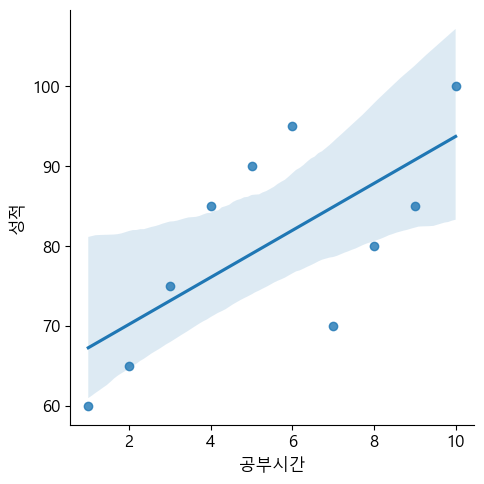

In [32]:
sns.lmplot(data = df3, x = '공부시간', y = '성적')
plt.show()

- 산점도와 추세선 상으로는 두 변수는 양의 상관관계를 보이고 있다.

In [33]:
df3.corr(method = 'pearson')

,공부시간,성적
공부시간,1.000000,0.684236
성적,0.684236,1.000000


- 피어슨 상관계수는 0.68으로 양의 상관관계를 확인할 수 있다.

In [34]:
pearsonr(df3['공부시간'], df3['성적'])

PearsonRResult(statistic=0.6842363116996173, pvalue=0.029083749057619408)

- 피어슨 상관계수에 대한 p-value는 0.03으로, 귀무가설이 기각되어 두 변수는 상관관계가 있다